In [7]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
all_data = pd.read_excel('data/mixture/Sensor 1_sensor 2_sensor 3_111_121_112_211.xlsx')
all_data.head()

,Dilutions,Voltage sensor1_111,sensor2_111,sensor3_111,Sensor 1_121,Sensor2_121,Sensor 3_121,Sensor1_ 211,Sensor2_ 211,Sensor3_ 211,Sensor1_ 112,Sensor2_ 112,Sensor3_ 112
0,0.10000,194,159.640,157.0,327.0,-492.80,249,359.0,190.000,232.0,359.600,24.90,207.00
1,0.01000,166,120.780,143.0,303.0,-447.13,244,347.0,134.352,203.0,326.500,-44.00,220.00
2,0.00100,162,110.600,110.0,284.0,-441.27,139,304.0,110.380,184.0,305.900,-108.90,229.90
3,0.00010,160,103.806,114.9,237.1,-139.70,147,269.0,96.063,-182.0,281.773,-148.54,123.20
4,0.00001,159,103.124,143.0,189.0,-149.63,168,214.0,93.200,-173.0,241.756,-173.67,147.69


In [9]:
mix_111_sensor1 = pd.read_excel('data/time_data/ratio_111/Sensor 1_111.xlsx')
mix_111_sensor2 = pd.read_excel('data/time_data/ratio_111/Sensor 2_111.xlsx')
mix_111_sensor3 = pd.read_excel('data/time_data/ratio_111/Sensor 3_111.xlsx')

mix_111 = pd.DataFrame()
mix_111['Dilution'] = mix_111_sensor1['Dilutions']
mix_111['Sensor1'] = mix_111_sensor1['Voltage sensor1_111']
mix_111['Sensor2'] = mix_111_sensor2['Voltage_sensor2_111']
mix_111['Sensor3'] = mix_111_sensor3['Voltage _sensor3_111']
mix_111['Label'] = ['Mix_111' for i in range(len(mix_111))]
mix_111 = mix_111[['Dilution','Sensor1','Sensor2','Sensor3','Label']]

analyte1 = pd.read_csv('data/unsampled/Unsampled_Analyte1.csv').drop(['CFU/mL'], axis=1)
analyte2 = pd.read_csv('data/unsampled/Unsampled_Analyte2.csv').drop(['CFU/mL'], axis=1)
analyte3 = pd.read_csv('data/unsampled/Unsampled_Analyte3.csv').drop(['CFU/mL'], axis=1)

analyte1['Dilution'] = mix_111['Dilution']
analyte1['Label'] = ['A1' for i in range(len(analyte1))]

analyte2['Dilution'] = mix_111['Dilution'] 
analyte2['Label'] = ['A2' for i in range(len(analyte2))]

analyte3['Dilution'] = mix_111['Dilution']
analyte3['Label'] = ['A3' for i in range(len(analyte3))]

analyte1 = analyte1[['Dilution','Sensor1','Sensor2','Sensor3','Label']]
analyte2 = analyte2[['Dilution','Sensor1','Sensor2','Sensor3','Label']]
analyte3 = analyte3[['Dilution','Sensor1','Sensor2','Sensor3','Label']]


mix_101 = pd.read_excel('data/time_data/ratio_101/all_sensors_101.xlsx').drop(['Dilutions'],axis=1)
mix_101['Sensor1'] = mix_101['Voltage _sensor1_analyte1_analyte3(1:1)']
mix_101['Sensor2'] = mix_101['Voltage _sensor2_analyte1_analyte3(1:1)']
mix_101['Sensor3'] = mix_101['Voltage _sensor3_analyte1_analyte3(1:1)']
mix_101 = mix_101.drop(['Voltage _sensor1_analyte1_analyte3(1:1)','Voltage _sensor2_analyte1_analyte3(1:1)','Voltage _sensor3_analyte1_analyte3(1:1)'], axis=1)
mix_101['Dilution'] = mix_111['Dilution']
mix_101['Label'] = ['Mix_101' for i in range(len(mix_101))]
mix_101 = mix_101[['Dilution','Sensor1','Sensor2','Sensor3','Label']]

In [10]:
mix_121 = pd.DataFrame()
mix_121['Sensor1'] = all_data['Sensor 1_121']
mix_121['Sensor2'] = all_data['Sensor2_121']
mix_121['Sensor3'] = all_data['Sensor 3_121']
mix_121['Label'] = ['Mix_121' for i in range(len(mix_121))]
mix_121['Dilution'] = mix_101['Dilution']
mix_121 = mix_121[['Dilution','Sensor1','Sensor2','Sensor3','Label']]

mix_211 = pd.DataFrame()
mix_211['Sensor1'] = all_data['Sensor1_ 211']
mix_211['Sensor2'] = all_data['Sensor2_ 211']
mix_211['Sensor3'] = all_data['Sensor3_ 211']
mix_211['Label'] = ['Mix_211' for i in range(len(mix_211))]
mix_211['Dilution'] = mix_101['Dilution']
mix_211 = mix_211[['Dilution','Sensor1','Sensor2','Sensor3','Label']]


mix_112 = pd.DataFrame()
mix_112['Sensor1'] = all_data['Sensor1_ 112']
mix_112['Sensor2'] = all_data['Sensor2_ 112']
mix_112['Sensor3'] = all_data['Sensor3_ 112']
mix_112['Label'] = ['Mix_112' for i in range(len(mix_112))]
mix_112['Dilution'] = mix_101['Dilution']
mix_112 = mix_112[['Dilution','Sensor1','Sensor2','Sensor3','Label']]

In [11]:
all_data = pd.read_csv('data/mixture/total_new_data(5 mixtures).csv')
all_data = pd.concat([all_data, mix_121, mix_211, mix_112], axis=0).reset_index(drop=True)

all_data.to_csv('data/mixture/total_new_data(8 mixtures).csv', index=False)
all_data.to_excel('data/mixture/total_new_data(8 mixtures).xlsx', index=False)

all_data.head()

,Dilution,Sensor1,Sensor2,Sensor3,Label
0,0.10000,-68.02,70.734,52.47,A1
1,0.01000,-95.70,50.162,32.63,A1
2,0.00100,-99.96,-8.390,-10.41,A1
3,0.00010,-107.42,-18.700,-23.93,A1
4,0.00001,-109.94,-19.620,-27.24,A1


### PCA

In [12]:
all_data = pd.read_excel('data/mixture/total_new_data(8 mixtures).xlsx')

labels = all_data['Label']
labels = labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_121':5, 'Mix_211':6, 'Mix_112':7})

all_data = all_data.drop(['Dilution','Label'], axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_data)

pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_data.head()

,PC1,PC2
0,-187.890728,-7.931970
1,-202.043966,-42.657566
2,-185.621412,-92.832078
3,-189.646498,-106.343482
4,-192.093846,-108.870334


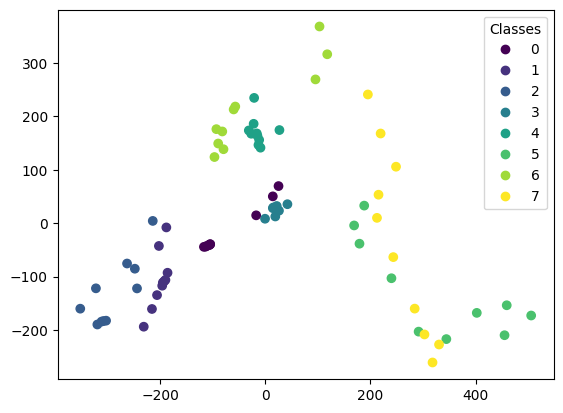

In [13]:
import matplotlib.pyplot as plt

label_mapping = {0:'Mix_101', 1:'A1',2: 'A2',3: 'A3', 4:'Mix_111', 5:'Mix_121', 6:'Mix_211', 7:'Mix_112'}

scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()